# SVM Classification for ActiveMQ 5.0.0 Dataset

This notebook implements SVM classification on the HCBOU-balanced ActiveMQ dataset for software defect prediction.

In [19]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load HCBOU-Balanced Dataset

In [20]:
# Load training data (balanced and scaled)
X_train = pd.read_csv('activemq-5.0.0-hcbou-train-features-balanced-scaled.csv')
y_train = pd.read_csv('activemq-5.0.0-hcbou-train-labels-balanced.csv')['class']

# Load test data (scaled)
X_test = pd.read_csv('activemq-5.0.0-hcbou-test-features-scaled.csv')
y_test = pd.read_csv('activemq-5.0.0-hcbou-test-labels.csv')['RealBug']

print(f"Training set shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

print(f"\nTraining set class distribution:")
print(y_train.value_counts())

print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set shape: (1506, 65)
Training labels shape: (1506,)
Test set shape: (377, 65)
Test labels shape: (377,)

Training set class distribution:
class
False    753
True     753
Name: count, dtype: int64

Test set class distribution:
RealBug
False    318
True      59
Name: count, dtype: int64


## SVM Model Implementation

In [ ]:
# Initialize SVM with croos-validation parameters
svm_model = SVC(kernel='rbf', C=100, gamma='scale')

print("SVM Model Parameters:")
print(f"Kernel: {svm_model.kernel}")
print(f"C (regularization): {svm_model.C}")
print(f"Gamma: {svm_model.gamma}")

SVM Model Parameters:
Kernel: rbf
C (regularization): 100
Gamma: scale


## Model Training

In [28]:
# Train the SVM model
print("Training SVM model...")
svm_model.fit(X_train, y_train)
print("Training completed!")

print(f"\nNumber of support vectors: {svm_model.n_support_}")
print(f"Total support vectors: {sum(svm_model.n_support_)}")

Training SVM model...
Training completed!

Number of support vectors: [239 244]
Total support vectors: 483


## Model Evaluation

In [29]:
# Generate predictions
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)

print("SVM Performance Metrics:")
print("=" * 40)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

SVM Performance Metrics:
Accuracy:  0.8541
Precision: 0.5333
Recall:    0.5424
F1-Score:  0.5378


In [30]:
# Detailed classification report
print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred))


Detailed Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.91      0.91       318
        True       0.53      0.54      0.54        59

    accuracy                           0.85       377
   macro avg       0.72      0.73      0.73       377
weighted avg       0.86      0.85      0.85       377



## Confusion Matrix

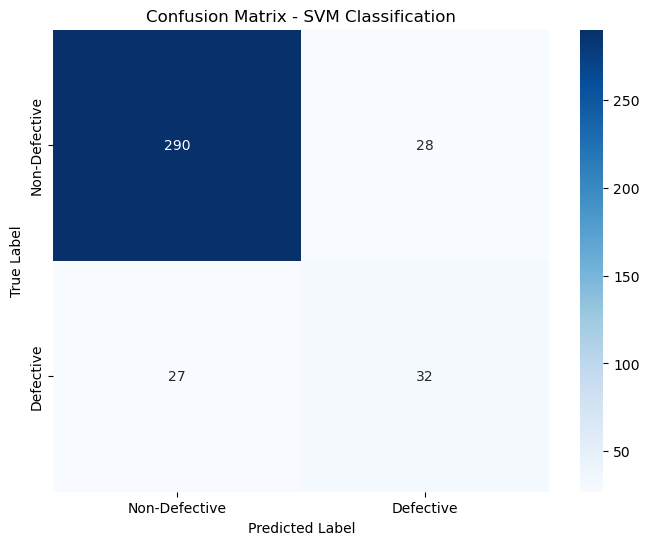


Confusion Matrix:
True Label vs Predicted Label
                 Non-Defective  Defective
Non-Defective         290          28    
Defective             27           32    


In [31]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Defective', 'Defective'],
            yticklabels=['Non-Defective', 'Defective'])
plt.title('Confusion Matrix - SVM Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:")
print("True Label vs Predicted Label")
print(f"                 Non-Defective  Defective")
print(f"Non-Defective    {cm[0,0]:^13}  {cm[0,1]:^9}")
print(f"Defective        {cm[1,0]:^13}  {cm[1,1]:^9}")

## Summary

In [32]:
# Summary of results
print("SVM Classification Summary for ActiveMQ 5.0.0")
print("=" * 50)
print(f"Dataset: ActiveMQ 5.0.0 (HCBOU-balanced)")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"\nSVM Configuration:")
print(f"- Kernel: RBF (default)")
print(f"- C: {svm_model.C}")
print(f"- Gamma: {svm_model.gamma}")
print(f"\nPerformance:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1-Score: {f1:.4f}")
print(f"\nSupport Vectors: {sum(svm_model.n_support_)} / {X_train.shape[0]} ({sum(svm_model.n_support_)/X_train.shape[0]*100:.1f}%)")

SVM Classification Summary for ActiveMQ 5.0.0
Dataset: ActiveMQ 5.0.0 (HCBOU-balanced)
Training samples: 1506
Test samples: 377
Features: 65

SVM Configuration:
- Kernel: RBF (default)
- C: 100
- Gamma: scale

Performance:
- Accuracy: 0.8541
- Precision: 0.5333
- Recall: 0.5424
- F1-Score: 0.5378

Support Vectors: 483 / 1506 (32.1%)
